In [1]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import tree

In [ ]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df["type"] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   type               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.type.value_counts()

2    50
1    50
0    50
Name: type, dtype: int64

In [ ]:
# Split sets

size = len(df)
train_rate = 0.8
features = ["sepal length (cm)","sepal width (cm)",\
            "petal length (cm)","petal width (cm)"]
label = "type"

X_train, y_train = df.loc[:size*train_rate,features],\
                   df.loc[:size*train_rate,label],

X_test, y_test =  df.loc[size*(1-train_rate):,features],\
                  df.loc[size*(1-train_rate):,label],

print(f"X_train shape: {X_train.shape} , y_train shape {y_train.shape}.")
print(f"X_test shape: {X_test.shape} , y_test shape {y_test.shape}.")


X_train shape: (121, 4) , y_train shape (121,).
X_test shape: (120, 4) , y_test shape (120,).


# Random Forest


### Hyperparámetros

### Default Model

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train,y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.241523


### Feature importance

In [ ]:
# Gini importance
rf_model.feature_importances_

array([0.00563619, 0.00424192, 0.48402562, 0.50609627])

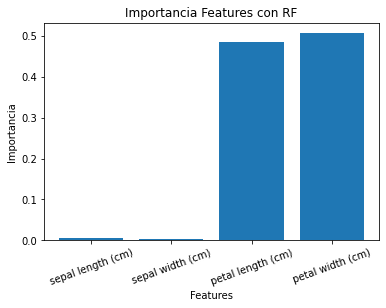

In [ ]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation=20)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()


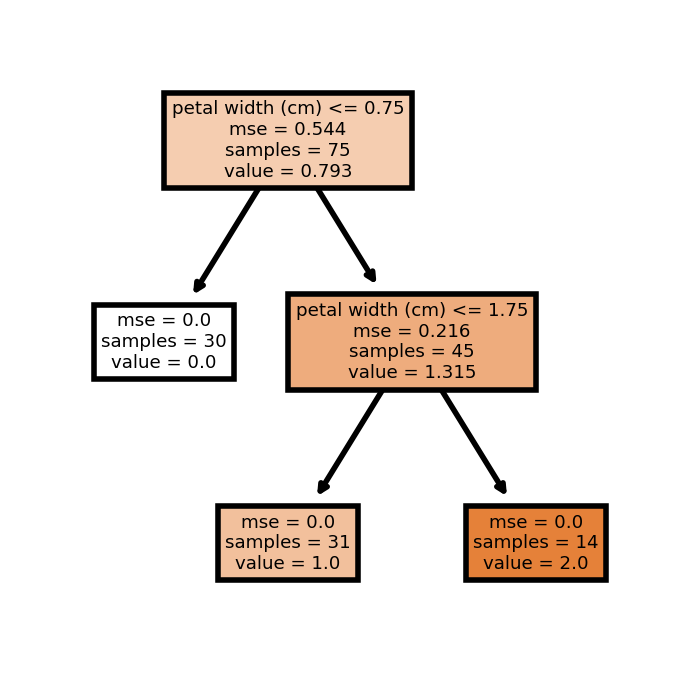

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=400)
tree.plot_tree(rf_model.estimators_[0],
               feature_names = X_train.columns,
               filled = True);


In [ ]:
##

### Predeterminated model

In [ ]:
num_of_trees = 20
max_depth = 5
max_features = 2
min_to_split = 15
min_to_leaf = 75

In [ ]:
num_of_trees = 5
max_depth = 3
max_features = 3
min_to_split = 15
min_to_leaf = 1


rf_my_model = RandomForestClassifier(n_estimators=num_of_trees,\
                                     max_depth = max_depth,\
                                     max_features = max_features,\
                                     min_samples_split = min_to_split,\
                                     min_samples_leaf = min_to_leaf,\
                                     random_state=1)
rf_my_model.fit(X_train,y_train)
preds = rf_my_model.predict(X_test)
rms = rf_my_model.score(X_test,y_test)
print("Error: ",rms)

Error:  0.9666666666666667


In [ ]:
(preds == y_test).mean()

0.9416666666666667

##Hyperparameters tunning 

In [ ]:
from random import randint

class RandomForestRandomSearch():

  def __init__(cls,X,y):
    cls.model = None
    cls.X,cls.y = X,y
    cls.results = []

    # Hyperparams
    cls.n_estimators = []
    cls.max_depth = []
    cls.max_features = []
    cls.min_samples_split = []
    cls.min_samples_leaf = []
    cls.seed = []

    cls.hyp_list = { "n_estimators" : cls.n_estimators,
                      "max_depth": cls.max_depth,
                      "max_features": cls.max_features,
                      "min_samples_split": cls.min_samples_split,
                      "min_samples_leaf": cls.min_samples_leaf,
                      "random_state": cls.seed
    }

  def set_data(cls, X, y):
    cls.X,cls.y = X,y
  
  def set_n_estimators(cls, estimators):
    cls.n_estimators.extend(estimators)

  def set_max_depth(cls, depth):
    cls.max_depth.extend(depth)

  def set_max_features(cls, features):
    cls.max_features.extend(features)

  def set_min_samples_split(cls, samples):
    cls.min_samples_split.extend(samples)

  def set_min_samples_leaf(cls, samples):
    cls.min_samples_leaf.extend(samples)

  def set_seed(cls, seed):
    cls.seed.extend(seed)

  def run(cls,volumen=10000):

    random_params = { }

    separator = int(len(cls.X)*0.8)
    X_train, y_train = cls.X.loc[:separator],\
                       cls.y.loc[:separator],

    X_test, y_test =  cls.X.loc[separator:],\
                      cls.y.loc[separator:],

    for i in range(volumen):

      for name,list in cls.hyp_list.items():
        rand_idx = randint(0,len(list)-1)
        random_params[name] = list[rand_idx]
      
      cls.__build_model(random_params)
      cls.__train_model(X_train,y_train)
      score = cls.__test_model(X_test,y_test)

      cls.__log(random_params,round(score,3))

      if i% int(volumen/10) is 0: print(f" {round(i*100/volumen)}% completo..")


  def __build_model(cls,hp):

    del cls.model 
    cls.model = RandomForestClassifier(n_estimators=hp["n_estimators"],\
                                    max_depth = hp["max_depth"],\
                                    max_features = hp["max_features"],\
                                    min_samples_split = hp["min_samples_split"],\
                                    min_samples_leaf = hp["min_samples_leaf"],\
                                    random_state=hp["random_state"]
                                )
    

  def __train_model(cls,X,y):
    cls.model.fit(X,y)
  

  def __test_model(cls,X,y):
    score = cls.model.score(X,y)
    return score


  def __log(cls,hp,score):

    reg = []
    for key in hp:
      reg.append(hp[key])
    reg.append(score)

    cls.results.append(reg)


  def get_results(cls):

    columns = [ key.upper() for key in cls.hyp_list]
    columns.append("SCORE")
    return cls.results,columns


#### Primer tunning

In [ ]:
features = ["sepal length (cm)","sepal width (cm)",\
            "petal length (cm)","petal width (cm)"]
label = "type"

tunner = RandomForestRandomSearch(df.loc[:,features],\
                                  df.loc[:,label])

In [ ]:
tunner.set_n_estimators([2,4,6,8,10,14,15])
tunner.set_max_depth([2,4,5,10,15,20])
tunner.set_max_features([2,4])
tunner.set_min_samples_split([8,15,25,50,60])
tunner.set_min_samples_leaf([4,8,15,20,25])
tunner.set_seed([1])

In [ ]:
tunner.run(30000)

 0% completo..
 10% completo..
 20% completo..
 30% completo..
 40% completo..
 50% completo..
 60% completo..
 70% completo..
 80% completo..
 90% completo..


In [ ]:
data,columns = tunner.get_results()
df_results = pd.DataFrame(data,columns=columns)
df_results.head(5)

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE
0,15,10,4,8,25,1,0.0
1,4,5,2,50,4,1,0.0
2,10,15,2,25,4,1,1.0
3,2,15,4,25,25,1,0.0
4,2,20,4,50,25,1,0.0


In [ ]:
df_results.SCORE.value_counts()

0.000    4788
0.900    1580
0.833    1090
0.967     677
0.733     533
0.767     488
0.800     377
1.000     273
0.933     113
0.867      81
Name: SCORE, dtype: int64

In [ ]:
max_score = df_results["SCORE"].max()
optimized_data = df_results[df_results["SCORE"] == max_score]
optimized_data.head(5)

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE
2,10,15,2,25,4,1,1.0
40,6,2,4,25,4,1,1.0
95,6,10,2,25,4,1,1.0
128,10,4,4,25,15,1,1.0
134,10,5,2,25,4,1,1.0


In [ ]:
optimized_data.value_counts().to_frame().reset_index().rename(columns={0:"COUNTS"})

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE,COUNTS
0,10,4,4,15,15,1,1.0,11
1,10,4,4,25,15,1,1.0,11
2,2,2,4,50,20,1,1.0,10
3,2,15,4,50,20,1,1.0,9
4,6,15,2,25,4,1,1.0,9
5,6,20,2,15,4,1,1.0,8
6,10,5,2,25,4,1,1.0,8
7,10,10,4,25,15,1,1.0,7
8,6,2,4,25,4,1,1.0,7
9,6,4,2,25,4,1,1.0,7


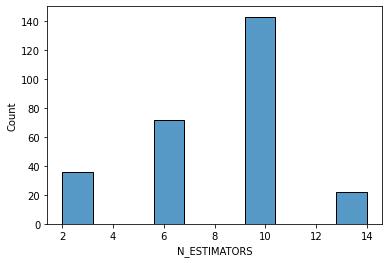

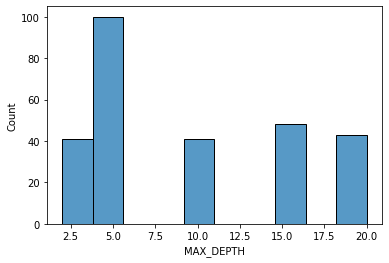

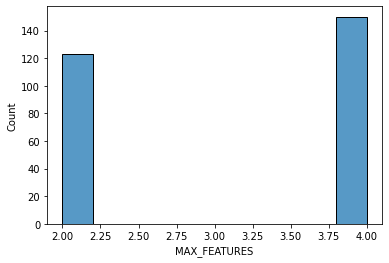

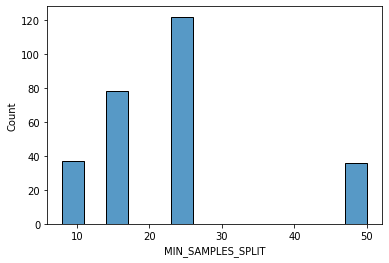

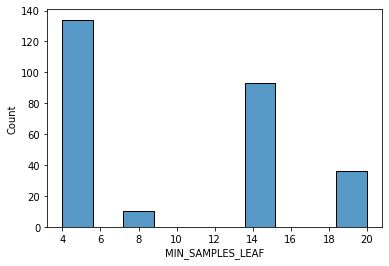

In [ ]:
import seaborn as sns

for column in optimized_data:
  if optimized_data[column].value_counts().size == 1:continue
  sns.histplot(optimized_data[column])
  plt.show()

In [ ]:
my_model = RandomForestClassifier(10,'gini',5,15,4,max_features=4,random_state=1)
my_model.fit(df.loc[:int(len(df)*0.8),features],\
             df.loc[:int(len(df)*0.8),label])

my_model.score(df.loc[:int(len(df)*0.8),features],\
             df.loc[:int(len(df)*0.8),label])

#### Segundo **tunning**



In [ ]:
features = ["sepal length (cm)","sepal width (cm)",\
            "petal length (cm)","petal width (cm)"]
label = "type"

tunner = RandomForestRandomSearch(df.loc[:,features],\
                                  df.loc[:,label])

tunner.set_n_estimators([7,8,9,10,11,12,13])
tunner.set_max_depth([1,2,3,4,5,6,7])
tunner.set_max_features([3,4])
tunner.set_min_samples_split([15,17,20,25,27,30,35])
tunner.set_min_samples_leaf([4,6,8,11,15,17,20,23,25])
tunner.set_seed([1])

In [ ]:
tunner.run(30000)

 0% completo..


KeyboardInterrupt: ignored

In [ ]:
results,columns = tunner.get_results()
df_results = pd.DataFrame(results,columns=columns)
display(df_results.info())
df_results.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N_ESTIMATORS       30100 non-null  int64  
 1   MAX_DEPTH          30100 non-null  int64  
 2   MAX_FEATURES       30100 non-null  int64  
 3   MIN_SAMPLES_SPLIT  30100 non-null  int64  
 4   MIN_SAMPLES_LEAF   30100 non-null  int64  
 5   RANDOM_STATE       30100 non-null  int64  
 6   SCORE              30100 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


None

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE
0,8,1,3,35,25,1,0.000
1,13,3,4,35,23,1,0.000
2,13,7,3,35,4,1,0.900
3,13,7,3,17,17,1,0.933
4,8,6,4,17,8,1,0.833


In [ ]:
max_score = df_results["SCORE"].max()
optimized_data = df_results[ df_results["SCORE"]==max_score]
optimized_data.value_counts().to_frame().head(10)

0
N_ESTIMATORS MAX_DEPTH MAX_FEATURES MIN_SAMPLES_SPLIT MIN_SAMPLES_LEAF RANDOM_STATE SCORE    
9            7         4            15                15               1            1.0    10
             4         4            27                15               1            1.0    10
7            2         4            15                15               1            1.0     9
10           2         4            35                15               1            1.0     9
7            3         4            15                15               1            1.0     9
9            7         4            30                15               1            1.0     9
             6         4            35                15               1            1.0     9
10           6         4            25                15               1            1.0     8
             5         4            20                15               1            1.0     8
                                    35                4                1            1.0     8

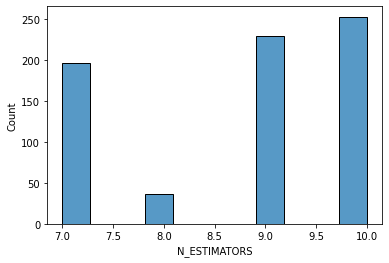

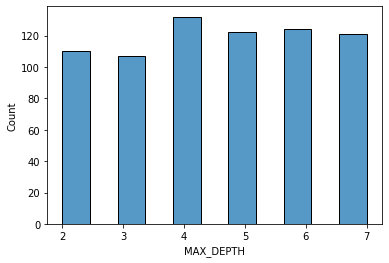

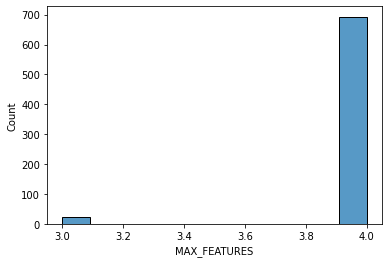

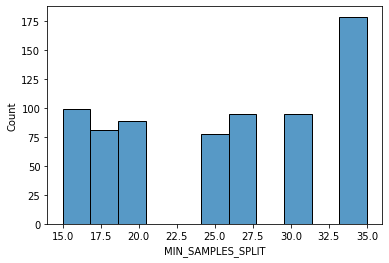

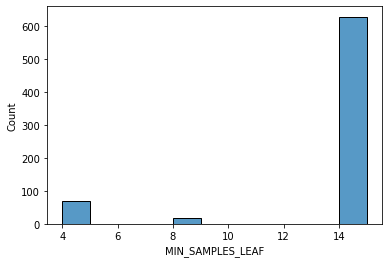

In [ ]:
import seaborn as sns

for column in optimized_data:
  if optimized_data[column].value_counts().size == 1:continue
  sns.histplot(optimized_data[column])
  plt.show()

#### Tercer tunning



In [ ]:
features = ["sepal length (cm)","sepal width (cm)",\
            "petal length (cm)","petal width (cm)"]
label = "type"

tunner = RandomForestRandomSearch(df.loc[:,features],\
                                  df.loc[:,label])

tunner.set_n_estimators([7,8,9,10,11,12,13])
tunner.set_max_depth([1,2,3,4,5,6,7])
tunner.set_max_features([3,4])
tunner.set_min_samples_split([15,17,20,25,27,30,35])
tunner.set_min_samples_leaf([4,6,8,11,15,17,20,23,25])
tunner.set_seed([1])

In [ ]:
tunner.run(30000)

In [ ]:
results,columns = tunner.get_results()
df_results = pd.DataFrame(results,columns=columns)
df_results.sort_values("SCORE",ascending=False).head(10)

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE
5336,9,6,4,15,15,1,1.0
15127,7,4,4,27,15,1,1.0
25725,8,4,4,35,8,1,1.0
15111,10,4,4,30,15,1,1.0
10874,9,6,4,27,15,1,1.0
26100,7,5,4,15,15,1,1.0
3953,9,3,4,20,15,1,1.0
2888,7,2,4,17,15,1,1.0
12206,9,4,4,30,15,1,1.0
23561,8,7,4,35,4,1,1.0


In [ ]:
df_results.corr()

,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE
N_ESTIMATORS,1.000000,0.000231,0.005985,-0.001396,0.006637,NaN,-0.019330
MAX_DEPTH,0.000231,1.000000,-0.001354,-0.002675,-0.005090,NaN,0.359113
MAX_FEATURES,0.005985,-0.001354,1.000000,-0.004218,-0.005419,NaN,0.024919
MIN_SAMPLES_SPLIT,-0.001396,-0.002675,-0.004218,1.000000,-0.004684,NaN,0.000019
MIN_SAMPLES_LEAF,0.006637,-0.005090,-0.005419,-0.004684,1.000000,NaN,-0.503814
RANDOM_STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,-0.019330,0.359113,0.024919,0.000019,-0.503814,NaN,1.000000


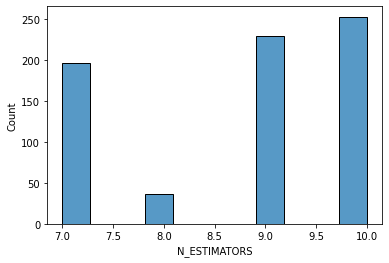

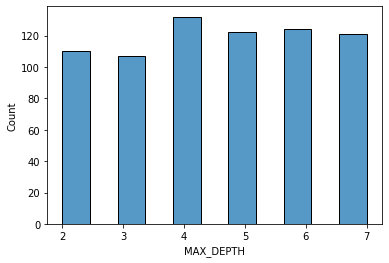

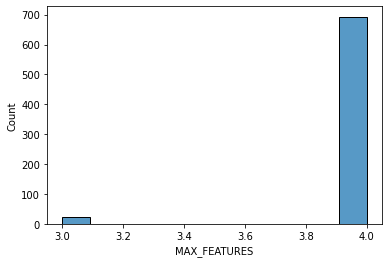

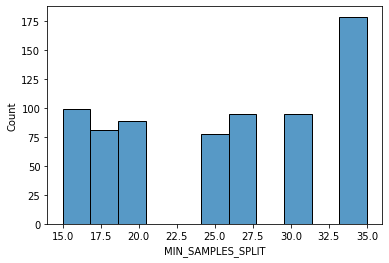

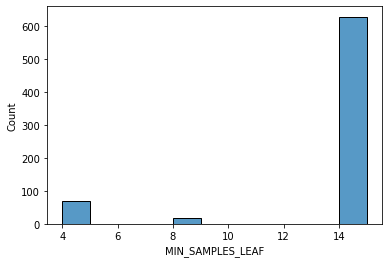

In [ ]:
import seaborn as sns

best_results = df_results[df_results["SCORE"] == 1 ]
for column in best_results:
  if best_results[column].value_counts().size == 1:continue
  sns.histplot(best_results[column])
  plt.show()


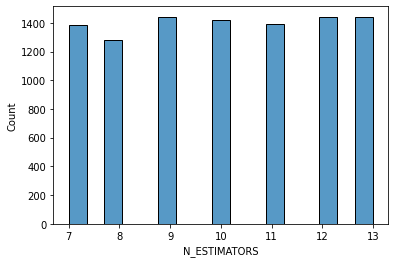

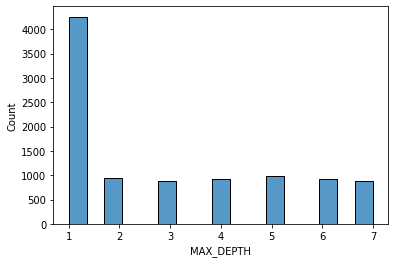

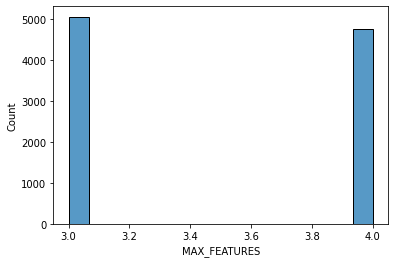

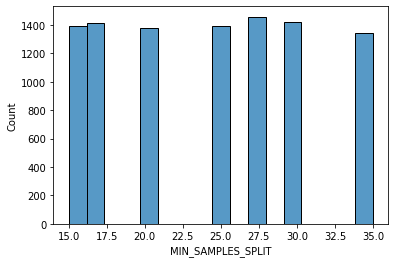

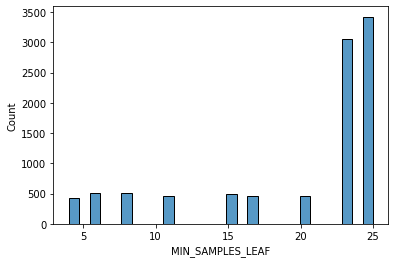

In [ ]:
worst_results = df_results[df_results["SCORE"]  < 0.2]

for column in worst_results:
  if worst_results[column].value_counts().size == 1:continue
  sns.histplot(worst_results[column])
  plt.show()

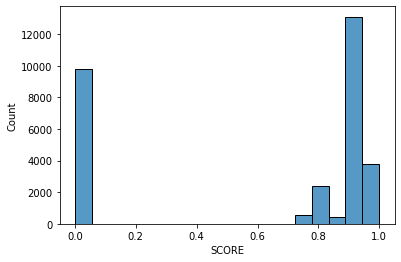

In [ ]:
sns.histplot(df_results["SCORE"])

0.0
0.0


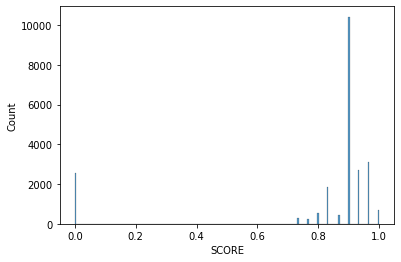

In [ ]:
print( df_results[df_results["MAX_DEPTH"]<2].SCORE.mean())
print(df_results[df_results["MIN_SAMPLES_LEAF"] > 23].SCORE.mean())
filtered = df_results[ (df_results["MAX_DEPTH"] >= 2) & (df_results["MIN_SAMPLES_LEAF"] <= 23)]
sns.histplot(filtered["SCORE"])

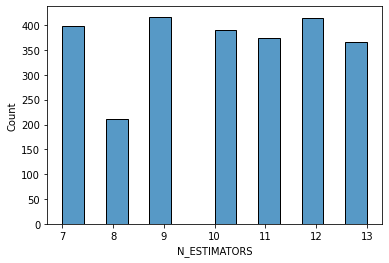

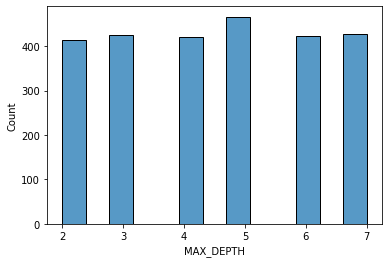

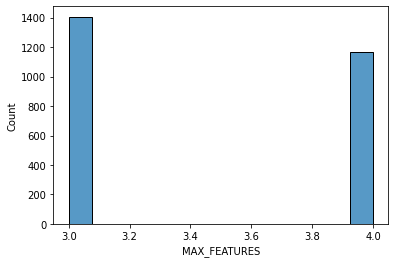

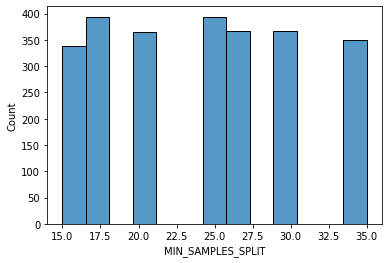

In [ ]:
worst_results = filtered[filtered.SCORE < 0.5]
for column in worst_results:
  if worst_results[column].value_counts().size == 1:continue
  sns.histplot(worst_results[column])
  plt.show()

In [ ]:
refiltered= filtered[filtered.MIN_SAMPLES_LEAF == 23]
refiltered["group"] = refiltered.SCORE == 0
refiltered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,N_ESTIMATORS,MAX_DEPTH,MAX_FEATURES,MIN_SAMPLES_SPLIT,MIN_SAMPLES_LEAF,RANDOM_STATE,SCORE,group
1,13,3,4,35,23,1,0.0,True
5,9,5,4,17,23,1,0.0,True
10,11,2,3,25,23,1,0.0,True
12,11,3,4,17,23,1,0.0,True
16,11,5,4,30,23,1,0.0,True
...,...,...,...,...,...,...,...,...
30047,7,3,3,25,23,1,0.0,True
30066,11,4,4,17,23,1,0.0,True
30070,9,4,3,20,23,1,0.0,True
30083,10,2,4,35,23,1,0.0,True


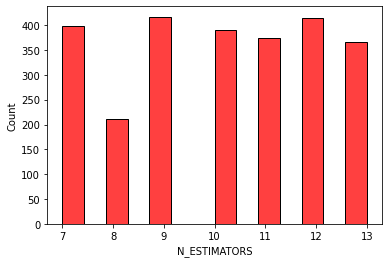

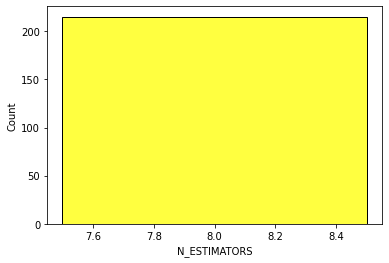

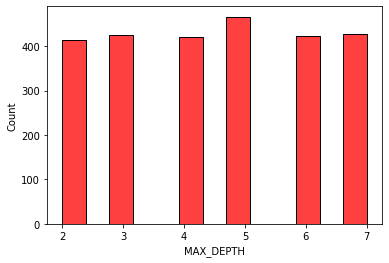

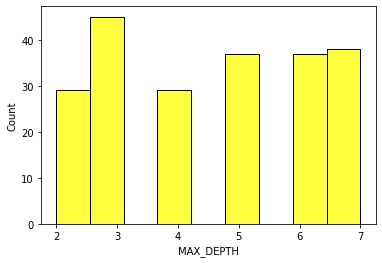

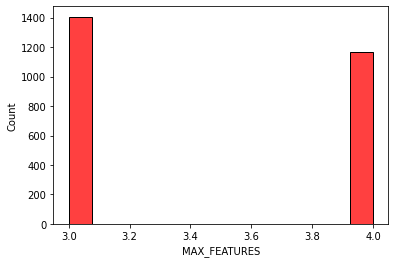

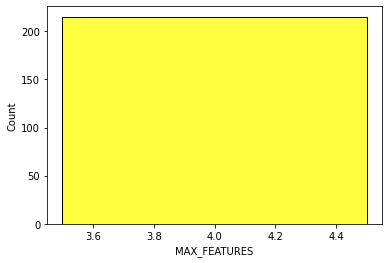

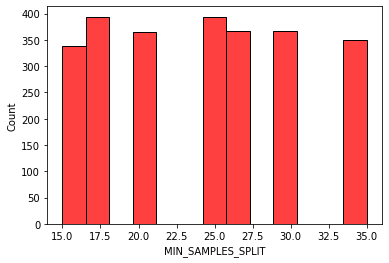

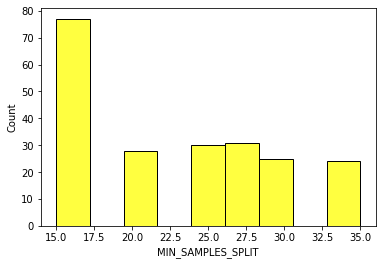

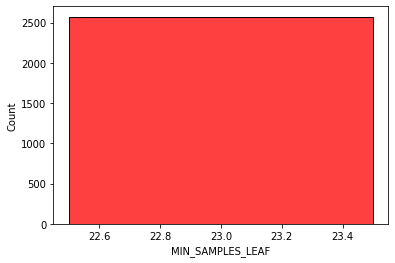

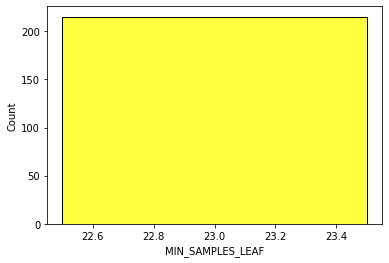

0.8669999999999981


In [ ]:

for column in refiltered:
  if column not in ["group","SCORE","RANDOM_STATE"]:


    sns.histplot(refiltered.loc[refiltered.group == True,column],color="red")
    plt.show()

    sns.histplot(refiltered.loc[refiltered.group == False,column],color="yellow")
    plt.show()

print(refiltered.loc[refiltered.group == False,"SCORE"].mean())

In [ ]:
### 

## Bayesian Optimization

In [15]:
from sklearn.model_selection import cross_val_score

dataset = datasets.load_iris()
X,y = dataset.data, dataset.target

def my_scorer(model,X,y):
  return model.score(X,y)

def objective(params):
  n_estimators = params[0]
  max_depth = params[1]
  max_features = params[2]
  min_samples_split = params[3]
  min_samples_leaf = params[4]

  model = RandomForestClassifier(n_estimators=n_estimators,\
                                     max_depth = max_depth,\
                                     max_features = max_features,\
                                     min_samples_split = min_samples_split,\
                                     min_samples_leaf = min_samples_leaf,\
                                     random_state=1)
  
  return -np.mean(cross_val_score(model,X,y,cv=1+int(len(X)/15),scoring= my_scorer))

In [6]:
!pip install scikit-optimize


In [16]:
from skopt import gp_minimize

space = [ [2,30],
          [2,20],
          [2,4],
          [8,60],
          [4,25]
        ]

r = gp_minimize(objective,space,n_calls=50,random_state=1)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packa

In [19]:
r.x

[9, 3, 4, 11, 4]

In [21]:
r.fun

-0.9670329670329672

#### Testing the result

In [26]:
train_rate = 0.8
separator = int(len(X)*train_rate)
X,y = pd.DataFrame(dataset.data), pd.Series(dataset.target)


X_train, y_train = X.loc[:separator],\
                   y.loc[:separator],

X_test, y_test = X.loc[separator:],\
                 y.loc[separator:],

model = RandomForestClassifier(n_estimators=9,\
                                     max_depth = 3,\
                                     max_features = 4,\
                                     min_samples_split = 11,\
                                     min_samples_leaf = 4,\
                                     random_state=1)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print("The score for this model is: ", score)

The score for this model is:  0.9333333333333333
